# 주제: 7일 배송에 대한 소비자의 감성 분석

In [ ]:
!pip uninstall -y transformers tokenizers sentence-transformers numpy

Found existing installation: transformers 4.41.2
Uninstalling transformers-4.41.2:
  Successfully uninstalled transformers-4.41.2
Found existing installation: tokenizers 0.19.1
Uninstalling tokenizers-0.19.1:
  Successfully uninstalled tokenizers-0.19.1
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4


In [ ]:
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

In [1]:
!pip install numpy==1.26.4
!pip install peft==0.10.0
!pip install transformers==4.41.2

  Using cached peft-0.10.0-py3-none-any.whl.metadata (13 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-manylinux

In [1]:
from transformers import Trainer  # 설치 완료 테스트

## 수집 데이터 import
- news.csv
- comments.csv


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

In [4]:
comments = pd.read_csv('/content/drive/MyDrive/2025_textmining/proj/comments.csv', usecols=['content', 'recommends', 'date', 'news_title'])
news = pd.read_csv('/content/drive/MyDrive/2025_textmining/proj/news.csv', usecols=['title',	'content', 'press', 'date', 'comments'])

comments.head()

,content,recommends,date,news_title
0,댓글단사람들 한진 직원인듯..주7일은 선넘은듯 난. 택배기사님들 충분히. 이해함,5,2025-05-15 00:40:00,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입"
1,여기 댓글 단.분들은 공무원이신갑네.ㅎ,1,2025-05-14 17:52:00,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입"
2,특고직 니들이 월급쟁이냐 힘들게 일하니 고용 산재라도 혜택보라구 말그대로 특고직 해...,1,2025-05-14 16:58:00,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입"
3,쿠팡이 택배시스템을 개판으로 만들어놨어고객이 편해졌겠지만 노동자들의 목숨과 바꾼것이다,0,2025-05-20 02:25:00,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입"
4,폐지해라 힘들다,3,2025-05-17 06:17:00,주 7일 배송 CJ대한통운 실적 주춤… 후발 업체는 눈치 보기


In [ ]:
news.head()

,title,content,press,date,comments
0,"쿠팡, 분기 11.4조 매출 신기록..대만도 '로켓배송' 달린다","(종합)6개 분기 연속 전년比 20%대 성장..김범석 ""수년간 전략적 투자 결실""상...",머니투데이,2025-05-07 11:24:57,5
1,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입",택배노조 한진본부 투쟁 돌입 선포 회견 [민주노총 서비스연맹 전국택배노동조합 제공]...,연합뉴스,2025-05-14 11:33:18,6
2,주 7일 배송 CJ대한통운 실적 주춤… 후발 업체는 눈치 보기,"수수료 늘며 1분기 영업익 21.9% 감소한진·롯데, 당분간 상황 지켜보며 대응 ...",조선비즈,2025-05-15 10:01:10,9
3,사상 첫 3조 매출 금자탑…‘휴일 배송’ 승부수 [CEO LOUNGE],조현민 한진 사장\n\n\n\n 1983년생/ 미국 남가주대(USC) 커뮤니케이션 ...,매경이코노미,2025-05-13 21:01:21,4
4,한진도 CJ대한통운 이어 '주7일' 배송…27일부터 시범시행,"한진, 4월말부터 매일배송 전격시행롯데글로벌로지스 등 다른 물류업체 등도 고민 중\...",뉴스1,2025-04-20 06:40:00,14


## 데이터 전처리




In [5]:
import re

def clean_text(text):
    if pd.isna(text): return ''
    text = re.sub(r"\n", " ", text)                  # 줄바꿈 제거
    text = re.sub(r"[^\uAC00-\uD7A3a-zA-Z0-9\s]", "", text)  # 한글, 영문 외 제거
    text = re.sub(r"\s+", " ", text).strip()         # 여러 공백 제거
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'[a-zA-Z]{10,}', '', text)
    return text

In [6]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 109.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 44.9 MB/s eta 0:00:00


In [15]:
from konlpy.tag import Okt

# 형태소 분석기 로드
okt = Okt()

# 모델 학습용 기본 불용어 리스트
model_stopwords = [
    '의', '가', '이', '은', '들', '는', '좀', '잘', '과', '도', '를',
    '으로', '자', '에', '와', '한', '하다', '되다', '있다', '없다', '이다', '같다'
]

# 워드클라우드용 불용어 리스트 (모델 불용어 + 주제 관련 단어 확장)
wordcloud_stopwords = model_stopwords + [
    '말하다', '생각하다', '그렇다', '이렇다', '때문', '정도', '자신',
    '택배', '배송', '기사', '7일', '일요일', '고객', '우리',
    '더', '다시', '이런', '저런', '그런', '걸', '건', '수', '것'
]

wc_stopwords = set(model_stopwords + wordcloud_stopwords)
stopwords = set(model_stopwords)

# 토큰화 + 불용어 제거 함수 -> 워드클라우드용
def tokenize_and_filter_wordlcoud(text):
    if not isinstance(text, str):
        return []  # 결측값 예외 처리
    tokens = okt.morphs(text, stem=True)
    clean_tokens = [word for word in tokens if word not in wc_stopwords and len(word) > 1]
    return clean_tokens

# 토큰화 + 불용어 제거 함수 -> 기본 모델용
def tokenize_and_filter(text):
    if not isinstance(text, str):
        return []  # 결측값 예외 처리
    tokens = okt.morphs(text, stem=True)
    clean_tokens = [word for word in tokens if word not in stopwords and len(word) > 1]
    return clean_tokens

In [8]:
comments['clean_content'] = comments['content'].apply(clean_text)
news['clean_content'] = news['content'].apply(clean_text)

comments['clean_content'].head()

,clean_content
0,댓글단사람들 한진 직원인듯주7일은 선넘은듯 난 택배기사님들 충분히 이해함
1,여기 댓글 단분들은 공무원이신갑네
2,특고직 니들이 월급쟁이냐 힘들게 일하니 고용 산재라도 혜택보라구 말그대로 특고직 해...
3,쿠팡이 택배시스템을 개판으로 만들어놨어고객이 편해졌겠지만 노동자들의 목숨과 바꾼것이다
4,폐지해라 힘들다


In [12]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # GPU 사용하지 않도록 설정

from pykospacing import Spacing

spacing = Spacing()

print("교정 전: " + comments['clean_content'][0])
print("교정 후: " + spacing(comments['clean_content'][0]))

교정 전: 댓글단사람들 한진 직원인듯주7일은 선넘은듯 난 택배기사님들 충분히 이해함
교정 후: 댓글단 사람들 한진 직원인 듯 주 7일은 선 넘은 듯 난 택배기사님들 충분히 이해함


In [13]:
comments['clean_content'] = comments['clean_content'].apply(spacing)

In [17]:
comments['wordcloud_tokens'] = comments['clean_content'].apply(tokenize_and_filter_wordlcoud)
comments['model_tokens'] = comments['clean_content'].apply(tokenize_and_filter)

comments['model_tokens'].head()

,model_tokens
0,"[댓글달다, 사람, 한진, 직원, 7일, 넘다, 택배, 기사, 들다, 충분하다, 이해]"
1,"[여기, 댓글, 공무원]"
2,"[특고, 월급쟁이, 힘들다, 하니, 고용, 산재, 라도, 혜택, 보라, 그대로, 특..."
3,"[쿠팡, 택배, 시스템, 개판, 만들다, 고객, 편하다, 노동자, 목숨, 바꾸다]"
4,"[폐지, 힘들다]"


In [21]:
comments.head()

,content,recommends,date,news_title,clean_content,wordcloud_tokens,model_tokens
0,댓글단사람들 한진 직원인듯..주7일은 선넘은듯 난. 택배기사님들 충분히. 이해함,5,2025-05-15 00:40:00,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입",댓글단 사람들 한진 직원인 듯 주 7일은 선 넘은 듯 난 택배기사님들 충분히 이해함,"[댓글달다, 사람, 한진, 직원, 넘다, 들다, 충분하다, 이해]","[댓글달다, 사람, 한진, 직원, 7일, 넘다, 택배, 기사, 들다, 충분하다, 이해]"
1,여기 댓글 단.분들은 공무원이신갑네.ㅎ,1,2025-05-14 17:52:00,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입",여기 댓글 단 분들은 공무원이 신갑네,"[여기, 댓글, 공무원]","[여기, 댓글, 공무원]"
2,특고직 니들이 월급쟁이냐 힘들게 일하니 고용 산재라도 혜택보라구 말그대로 특고직 해...,1,2025-05-14 16:58:00,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입",특고직 니들이 월급쟁이냐 힘들게 일하니 고용 산재라도 혜택보라구 말 그대로 특고직 ...,"[특고, 월급쟁이, 힘들다, 하니, 고용, 산재, 라도, 혜택, 보라, 그대로, 특...","[특고, 월급쟁이, 힘들다, 하니, 고용, 산재, 라도, 혜택, 보라, 그대로, 특..."
3,쿠팡이 택배시스템을 개판으로 만들어놨어고객이 편해졌겠지만 노동자들의 목숨과 바꾼것이다,0,2025-05-20 02:25:00,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입",쿠팡이 택배 시스템을 개판으로 만들어놨어 고객이 편해졌겠지만 노동자들의 목숨과 바꾼...,"[쿠팡, 시스템, 개판, 만들다, 편하다, 노동자, 목숨, 바꾸다]","[쿠팡, 택배, 시스템, 개판, 만들다, 고객, 편하다, 노동자, 목숨, 바꾸다]"
4,폐지해라 힘들다,3,2025-05-17 06:17:00,주 7일 배송 CJ대한통운 실적 주춤… 후발 업체는 눈치 보기,폐지해라 힘들다,"[폐지, 힘들다]","[폐지, 힘들다]"


In [22]:
comments.to_csv('comments_tokenize.csv')
news.to_csv('news_tokenize.csv')

## 전처리 완료된 데이터 재 import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cd /content/drive/MyDrive/2025_textmining/proj

In [45]:
import pandas as pd

comments_tokenize = pd.read_csv('/content/drive/MyDrive/2025_textmining/proj/comments_tokenize.csv').dropna(subset=["Unnamed: 0"]).reset_index(drop=True)
news_tokenize = pd.read_csv('/content/drive/MyDrive/2025_textmining/proj/news_tokenize.csv').dropna(subset=["Unnamed: 0"]).reset_index(drop=True)

In [42]:
comments_tokenize.head()

,Unnamed: 0,content,recommends,date,news_title,clean_content,wordcloud_tokens,model_tokens
0,0,댓글단사람들 한진 직원인듯..주7일은 선넘은듯 난. 택배기사님들 충분히. 이해함,5,2025-05-15 00:40:00,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입",댓글단 사람들 한진 직원인 듯 주 7일은 선 넘은 듯 난 택배기사님들 충분히 이해함,"['댓글달다', '사람', '한진', '직원', '넘다', '들다', '충분하다',...","['댓글달다', '사람', '한진', '직원', '7일', '넘다', '택배', '..."
1,1,여기 댓글 단.분들은 공무원이신갑네.ㅎ,1,2025-05-14 17:52:00,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입",여기 댓글 단 분들은 공무원이 신갑네,"['여기', '댓글', '공무원']","['여기', '댓글', '공무원']"
2,2,특고직 니들이 월급쟁이냐 힘들게 일하니 고용 산재라도 혜택보라구 말그대로 특고직 해...,1,2025-05-14 16:58:00,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입",특고직 니들이 월급쟁이냐 힘들게 일하니 고용 산재라도 혜택보라구 말 그대로 특고직 ...,"['특고', '월급쟁이', '힘들다', '하니', '고용', '산재', '라도', ...","['특고', '월급쟁이', '힘들다', '하니', '고용', '산재', '라도', ..."
3,3,쿠팡이 택배시스템을 개판으로 만들어놨어고객이 편해졌겠지만 노동자들의 목숨과 바꾼것이다,0,2025-05-20 02:25:00,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입",쿠팡이 택배 시스템을 개판으로 만들어놨어 고객이 편해졌겠지만 노동자들의 목숨과 바꾼...,"['쿠팡', '시스템', '개판', '만들다', '편하다', '노동자', '목숨',...","['쿠팡', '택배', '시스템', '개판', '만들다', '고객', '편하다', ..."
4,4,폐지해라 힘들다,3,2025-05-17 06:17:00,주 7일 배송 CJ대한통운 실적 주춤… 후발 업체는 눈치 보기,폐지해라 힘들다,"['폐지', '힘들다']","['폐지', '힘들다']"


In [46]:
comments_tokenize_label = pd.read_csv('/content/drive/MyDrive/2025_textmining/proj/comments_label.csv', usecols=['content', 'label'])
news_tokenize_label = pd.read_csv('/content/drive/MyDrive/2025_textmining/proj/news_label.csv', usecols=['content', 'label'])

In [38]:
comments_tokenize_label.head()

,label,content
0,0,댓글단사람들 한진 직원인듯..주7일은 선넘은듯 난. 택배기사님들 충분히. 이해함
1,1,여기 댓글 단.분들은 공무원이신갑네.ㅎ
2,0,특고직 니들이 월급쟁이냐 힘들게 일하니 고용 산재라도 혜택보라구 말그대로 특고직 해...
3,0,쿠팡이 택배시스템을 개판으로 만들어놨어고객이 편해졌겠지만 노동자들의 목숨과 바꾼것이다
4,0,폐지해라 힘들다


In [43]:
# content 기준으로 병합 (left join: comments_tokenize 기준)
merged_df = pd.merge(comments_tokenize, comments_tokenize_label[['content', 'label']], on='content', how='left')

# 결과 확인
print(merged_df.columns)
print(merged_df[['content', 'label']].head())

Index(['Unnamed: 0', 'content', 'recommends', 'date', 'news_title',
       'clean_content', 'wordcloud_tokens', 'model_tokens', 'label'],
      dtype='object')
                                             content  label
0       댓글단사람들 한진 직원인듯..주7일은 선넘은듯 난. 택배기사님들 충분히. 이해함    0.0
1                              여기 댓글 단.분들은 공무원이신갑네.ㅎ    1.0
2  특고직 니들이 월급쟁이냐 힘들게 일하니 고용 산재라도 혜택보라구 말그대로 특고직 해...    0.0
3    쿠팡이 택배시스템을 개판으로 만들어놨어고객이 편해졌겠지만 노동자들의 목숨과 바꾼것이다    0.0
4                                           폐지해라 힘들다    0.0


In [47]:
# content 기준으로 병합 (left join: news__tokenize 기준)
merged_news_df = pd.merge(news_tokenize, news_tokenize_label[['content', 'label']], on='content', how='left')

# 결과 확인
print(merged_news_df.columns)
print(merged_news_df[['content', 'label']].head())

Index(['Unnamed: 0', 'title', 'content', 'press', 'date', 'comments',
       'clean_content', 'label'],
      dtype='object')
                                             content label
0  (종합)6개 분기 연속 전년比 20%대 성장..김범석 "수년간 전략적 투자 결실"상...     1
1  택배노조 한진본부 투쟁 돌입 선포 회견 [민주노총 서비스연맹 전국택배노동조합 제공]...     0
2  수수료 늘며 1분기 영업익 21.9% 감소한진·롯데, 당분간 상황 지켜보며 대응  ...     0
3  조현민 한진 사장\n\n\n\n 1983년생/ 미국 남가주대(USC) 커뮤니케이션 ...     1
4  한진, 4월말부터 매일배송 전격시행롯데글로벌로지스 등 다른 물류업체 등도 고민 중\...     1


In [44]:
# label이 없는 행 제거
merged_df = merged_df.dropna(subset=['label'])

# label이 float으로 붙을 수도 있으니 정수로 형변환
merged_df['label'] = merged_df['label'].astype(int)

<ipython-input-44-3147582528>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['label'] = merged_df['label'].astype(int)


In [46]:
# 결과 저장
comments_tokenize = merged_df

In [53]:
comments_tokenize.to_csv('comments_tokenize_label.csv')

In [48]:
merged_news_df.to_csv('news_tokenize_label.csv')

## 긍부정 라벨링 - koBERT 이용

#### comments

In [24]:
import pandas as pd

comments_df = pd.read_csv('/content/drive/MyDrive/2025_textmining/proj/comments_tokenize_label.csv')

In [25]:
import pandas as pd

# 라벨별로 분리
positive_df = comments_df[comments_df['label'] == 1]
negative_df = comments_df[comments_df['label'] == 0]

# 개수 확인
print("긍정 개수:", len(positive_df))
print("부정 개수:", len(negative_df))

# 몇 배 복제할지 계산
rep_factor = len(negative_df) // len(positive_df)
print(f"긍정 샘플을 {rep_factor}배 복제")

# 복제 및 합치기
positive_upsampled = pd.concat([positive_df] * rep_factor, ignore_index=True)
balanced_df = pd.concat([negative_df, positive_upsampled], ignore_index=True)

# 섞기
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# 결과 확인
print("복제 후 긍정 개수:", sum(balanced_df['label'] == 1))
print("복제 후 부정 개수:", sum(balanced_df['label'] == 0))

긍정 개수: 86
부정 개수: 510
긍정 샘플을 5배 복제
복제 후 긍정 개수: 430
복제 후 부정 개수: 510


In [26]:
# koBERT tokenizer로 입력 포맷은 문장 형태
sentences = balanced_df['clean_content'].tolist()

# huggingface tokenizer 사용
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("monologg/kobert")

# koBERT 입력 포맷 변환
inputs = tokenizer(
    sentences,
    padding=True,
    truncation=True,
    max_length=64,
    return_tensors="pt"
)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'KoBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


In [28]:
# news_df = pd.read_csv('/content/drive/MyDrive/2025_textmining/proj/news_tokenize_label.csv')
# comments_df = pd.read_csv('/content/drive/MyDrive/2025_textmining/proj/comments_tokenize_label.csv')

comments_sentences = balanced_df['clean_content'].tolist()
comments_labels = [int(label) for label in balanced_df['label']]

# news_sentences = news_df['clean_content'].tolist()
# news_labels = [0 if str(label).strip() == '-' else int(label) for label in news_df['label']]

In [29]:
from sklearn.model_selection import train_test_split

# news_train_texts, news_val_texts, news_train_labels, news_val_labels = train_test_split(
#     news_sentences, news_labels, test_size=0.2, stratify=news_labels, random_state=42
# )

comments_train_texts, comments_val_texts, comments_train_labels, comments_val_labels = train_test_split(
    comments_sentences, comments_labels, test_size=0.2, stratify=comments_labels, random_state=42
)

In [30]:
from datasets import Dataset
from transformers import AutoTokenizer

# HuggingFace Dataset으로 변환
comments_train_dataset = Dataset.from_dict({
    'text': comments_train_texts,
    'label': comments_train_labels
})
comments_val_dataset = Dataset.from_dict({
    'text': comments_val_texts,
    'label': comments_val_labels
})

# KcELECTRA tokenizer
tokenizer = AutoTokenizer.from_pretrained("beomi/KcELECTRA-base")

# tokenize 함수 정의
def tokenize(example):
    return tokenizer(example['text'], padding='max_length', truncation=True, max_length=64)

# 토큰화 적용
comments_train_dataset = comments_train_dataset.map(tokenize, batched=True)
comments_val_dataset = comments_val_dataset.map(tokenize, batched=True)

# text 열 제거하고 torch 텐서로 변환
comments_train_dataset = comments_train_dataset.remove_columns("text")
comments_val_dataset = comments_val_dataset.remove_columns("text")
comments_train_dataset.set_format("torch")
comments_val_dataset.set_format("torch")

Map:   0%|          | 0/752 [00:00<?, ? examples/s]

Map:   0%|          | 0/188 [00:00<?, ? examples/s]

In [31]:
import torch

# GPU 사용 가능하면 GPU, 아니면 CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"사용 중인 디바이스: {device}")

사용 중인 디바이스: cuda


In [32]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

# KcELECTRA 모델 로드 (2개 클래스: 긍정/부정)
model = AutoModelForSequenceClassification.from_pretrained("beomi/KcELECTRA-base", num_labels=2)
model.to(device)

# 훈련 설정
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=30,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    # evaluation_strategy="epoch",
    # save_strategy="epoch",
    logging_dir="./logs",
    report_to="none",
)

# Trainer 설정
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=comments_train_dataset,
    eval_dataset=comments_val_dataset,
)

# 학습 시작
trainer.train()

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
500,0.095200
1000,0.003000


TrainOutput(global_step=1410, training_loss=0.03529593686685494, metrics={'train_runtime': 284.9635, 'train_samples_per_second': 79.168, 'train_steps_per_second': 4.948, 'total_flos': 741973176115200.0, 'train_loss': 0.03529593686685494, 'epoch': 30.0})

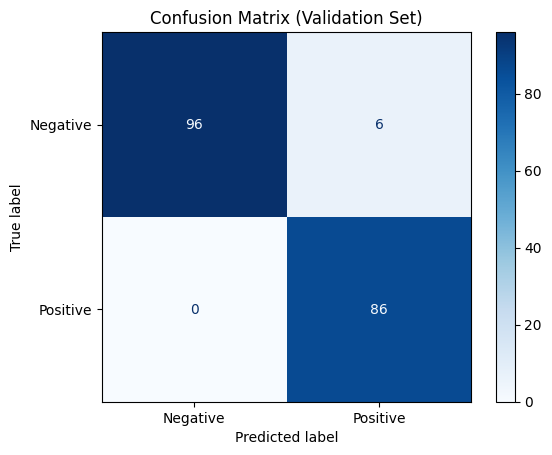

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 실제 레이블 (예: comments_val_labels 또는 comments_train_labels 중 하나)
true_labels = comments_val_labels  # 또는 comments_train_labels

# 예측 레이블 (Trainer 예측 결과에서 가져오기)
from transformers import Trainer
outputs = trainer.predict(comments_val_dataset)
predictions = outputs.predictions.argmax(axis=1)

# Confusion Matrix 계산
cm = confusion_matrix(true_labels, predictions)

# 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix (Validation Set)")
plt.grid(False)
plt.show()

In [34]:
from sklearn.metrics import classification_report, accuracy_score

# 예측값은 이미 있으므로 true_labels와 predictions 이용
print("✅ Accuracy:", accuracy_score(true_labels, predictions))

# 클래스별 precision, recall, f1-score 출력
print("\n📊 Classification Report:")
print(classification_report(true_labels, predictions, target_names=["Negative", "Positive"]))

✅ Accuracy: 0.9680851063829787

📊 Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.94      0.97       102
    Positive       0.93      1.00      0.97        86

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



In [39]:
model.save_pretrained("./sentiment_model")
tokenizer.save_pretrained("./sentiment_model")

('./sentiment_model/tokenizer_config.json',
 './sentiment_model/special_tokens_map.json',
 './sentiment_model/tokenizer.json')

In [20]:
# from transformers import AutoTokenizer, AutoModelForSequenceClassification

# # 저장된 경로에서 로드
# model_path = "/content/drive/MyDrive/2025_textmining/proj/sentiment_model"

# tokenizer = AutoTokenizer.from_pretrained(model_path)
# model = AutoModelForSequenceClassification.from_pretrained(model_path)

In [6]:
model.to('cuda')

ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(30000, 768, padding_idx=3)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): L

In [35]:
# 예측 함수 정의
def predict_sentiments(texts):
    inputs = tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=64,
        return_tensors="pt"
    )
    inputs = {k: v.to("cuda") for k, v in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
    return predictions.cpu().tolist()

# 예시: comments_tokenize의 clean_content 컬럼에 대해 예측
comments = comments_tokenize['clean_content'].tolist()
predicted_labels = predict_sentiments(comments)

# 결과 붙이기
comments_tokenize['predicted_label'] = predicted_labels

#### news

In [49]:
import pandas as pd

news_df = pd.read_csv('/content/drive/MyDrive/2025_textmining/proj/news_tokenize_label.csv')
news_texts = news_df['clean_content'].tolist()

In [57]:
import pandas as pd

# CSV 파일 읽기
news_df = pd.read_csv('/content/drive/MyDrive/2025_textmining/proj/news_tokenize_label.csv')

# '-'를 0으로 대체, NaN도 0으로 채운 후 int 변환
news_df['label'] = news_df['label'].replace('-', 0)
news_df['label'] = news_df['label'].fillna(0).astype(int)

In [58]:
from transformers import TextClassificationPipeline, AutoTokenizer, AutoModelForSequenceClassification

# 모델 & 토크나이저 로드
model = AutoModelForSequenceClassification.from_pretrained("./sentiment_model")
tokenizer = AutoTokenizer.from_pretrained("./sentiment_model")

# 파이프라인 구성
pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, device=0 if torch.cuda.is_available() else -1)

# 길이 자르기 함수
def truncate_text(text, max_len=512):
    input_ids = tokenizer.encode(text, add_special_tokens=False)
    input_ids = input_ids[:max_len]
    return tokenizer.decode(input_ids, skip_special_tokens=True)

# 뉴스 텍스트 불러오기
news_texts = news_df["clean_content"].astype(str).tolist()
truncated_news = [truncate_text(text) for text in news_texts]

# 🔥 전체 예측 수행
predictions = pipe(truncated_news, truncation=True)

# 🔁 결과 정제
predicted_labels = []
for pred in predictions:
    if isinstance(pred, list):  # 혹시 모를 이중 리스트 대응
        pred = pred[0]
    predicted_labels.append(pred['label'])

# 🔁 라벨 정수 변환
label_map = {'LABEL_0': 0, 'LABEL_1': 1}
news_df['predicted_label'] = [label_map.get(label, -1) for label in predicted_labels]

Token indices sequence length is longer than the specified maximum sequence length for this model (1079 > 512). Running this sequence through the model will result in indexing errors


✅ Accuracy: 0.3497

📊 Classification Report:
              precision    recall  f1-score   support

    Negative       0.35      1.00      0.52        64
    Positive       0.00      0.00      0.00       119

    accuracy                           0.35       183
   macro avg       0.17      0.50      0.26       183
weighted avg       0.12      0.35      0.18       183



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


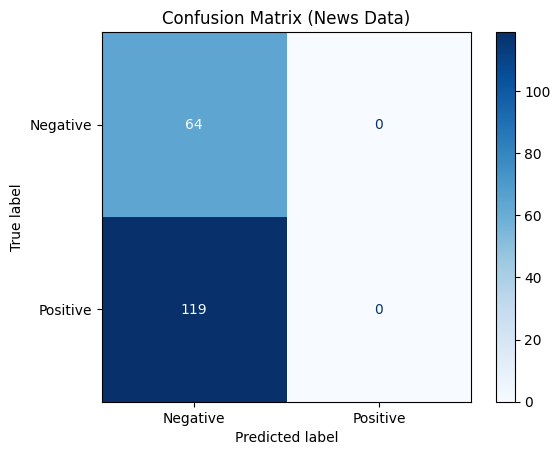

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 실제 라벨과 예측 라벨
true_labels = news_df["label"].astype(int)
pred_labels = news_df["predicted_label"].astype(int)

# 정확도
acc = accuracy_score(true_labels, pred_labels)
print(f"✅ Accuracy: {acc:.4f}\n")

# 분류 리포트
print("📊 Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=["Negative", "Positive"]))

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix (News Data)")
plt.grid(False)
plt.show()

In [72]:
news_df = news_df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [75]:
comments_df = comments_df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [76]:
news_df.head()

,title,content,press,date,comments,clean_content,label,predicted_label
0,"쿠팡, 분기 11.4조 매출 신기록..대만도 '로켓배송' 달린다","(종합)6개 분기 연속 전년比 20%대 성장..김범석 ""수년간 전략적 투자 결실""상...",머니투데이,2025-05-07 11:24:57,5,종합6개 분기 연속 전년 20대 성장김범석 수년간 전략적 투자 결실상장 이후 최대 ...,1,0
1,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입",택배노조 한진본부 투쟁 돌입 선포 회견 [민주노총 서비스연맹 전국택배노동조합 제공]...,연합뉴스,2025-05-14 11:33:18,6,택배노조 한진본부 투쟁 돌입 선포 회견 민주노총 서비스연맹 전국택배노동조합 제공 서...,0,0
2,주 7일 배송 CJ대한통운 실적 주춤… 후발 업체는 눈치 보기,"수수료 늘며 1분기 영업익 21.9% 감소한진·롯데, 당분간 상황 지켜보며 대응 ...",조선비즈,2025-05-15 10:01:10,9,수수료 늘며 1분기 영업익 219 감소한진롯데 당분간 상황 지켜보며 대응 주 7일 ...,0,0
3,사상 첫 3조 매출 금자탑…‘휴일 배송’ 승부수 [CEO LOUNGE],조현민 한진 사장\n\n\n\n 1983년생/ 미국 남가주대(USC) 커뮤니케이션 ...,매경이코노미,2025-05-13 21:01:21,4,조현민 한진 사장 1983년생 미국 남가주대USC 커뮤니케이션 전공 서울대 경영대학...,1,0
4,한진도 CJ대한통운 이어 '주7일' 배송…27일부터 시범시행,"한진, 4월말부터 매일배송 전격시행롯데글로벌로지스 등 다른 물류업체 등도 고민 중\...",뉴스1,2025-04-20 06:40:00,14,한진 4월말부터 매일배송 전격시행롯데글로벌로지스 등 다른 물류업체 등도 고민 중 3...,1,0


In [77]:
comments_df.head()

,content,recommends,date,news_title,clean_content,wordcloud_tokens,model_tokens,label
0,댓글단사람들 한진 직원인듯..주7일은 선넘은듯 난. 택배기사님들 충분히. 이해함,5,2025-05-15 00:40:00,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입",댓글단 사람들 한진 직원인 듯 주 7일은 선 넘은 듯 난 택배기사님들 충분히 이해함,"['댓글달다', '사람', '한진', '직원', '넘다', '들다', '충분하다',...","['댓글달다', '사람', '한진', '직원', '7일', '넘다', '택배', '...",0
1,여기 댓글 단.분들은 공무원이신갑네.ㅎ,1,2025-05-14 17:52:00,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입",여기 댓글 단 분들은 공무원이 신갑네,"['여기', '댓글', '공무원']","['여기', '댓글', '공무원']",1
2,특고직 니들이 월급쟁이냐 힘들게 일하니 고용 산재라도 혜택보라구 말그대로 특고직 해...,1,2025-05-14 16:58:00,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입",특고직 니들이 월급쟁이냐 힘들게 일하니 고용 산재라도 혜택보라구 말 그대로 특고직 ...,"['특고', '월급쟁이', '힘들다', '하니', '고용', '산재', '라도', ...","['특고', '월급쟁이', '힘들다', '하니', '고용', '산재', '라도', ...",0
3,쿠팡이 택배시스템을 개판으로 만들어놨어고객이 편해졌겠지만 노동자들의 목숨과 바꾼것이다,0,2025-05-20 02:25:00,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입",쿠팡이 택배 시스템을 개판으로 만들어놨어 고객이 편해졌겠지만 노동자들의 목숨과 바꾼...,"['쿠팡', '시스템', '개판', '만들다', '편하다', '노동자', '목숨',...","['쿠팡', '택배', '시스템', '개판', '만들다', '고객', '편하다', ...",0
4,폐지해라 힘들다,3,2025-05-17 06:17:00,주 7일 배송 CJ대한통운 실적 주춤… 후발 업체는 눈치 보기,폐지해라 힘들다,"['폐지', '힘들다']","['폐지', '힘들다']",0


In [85]:
# title 기준으로 조인 (left join: 댓글 중심)
merged_df = pd.merge(
    comments_df, news_df,
    left_on='news_title',
    right_on='title',
    how='inner',  # 또는 'left', 'outer', 분석 목적에 따라 선택.
    suffixes=('_comment', '_news')
)
# 결과 확인
print(merged_df[['label_comment', 'label_news']].head())

   label_comment  label_news
0              0           0
1              1           0
2              0           0
3              0           0
4              0           0


In [86]:
merged_df.head()

,content_comment,recommends,date_comment,news_title,clean_content_comment,wordcloud_tokens,model_tokens,label_comment,title,content_news,press,date_news,comments,clean_content_news,label_news,predicted_label
0,댓글단사람들 한진 직원인듯..주7일은 선넘은듯 난. 택배기사님들 충분히. 이해함,5,2025-05-15 00:40:00,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입",댓글단 사람들 한진 직원인 듯 주 7일은 선 넘은 듯 난 택배기사님들 충분히 이해함,"['댓글달다', '사람', '한진', '직원', '넘다', '들다', '충분하다',...","['댓글달다', '사람', '한진', '직원', '7일', '넘다', '택배', '...",0,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입",택배노조 한진본부 투쟁 돌입 선포 회견 [민주노총 서비스연맹 전국택배노동조합 제공]...,연합뉴스,2025-05-14 11:33:18,6,택배노조 한진본부 투쟁 돌입 선포 회견 민주노총 서비스연맹 전국택배노동조합 제공 서...,0,0
1,여기 댓글 단.분들은 공무원이신갑네.ㅎ,1,2025-05-14 17:52:00,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입",여기 댓글 단 분들은 공무원이 신갑네,"['여기', '댓글', '공무원']","['여기', '댓글', '공무원']",1,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입",택배노조 한진본부 투쟁 돌입 선포 회견 [민주노총 서비스연맹 전국택배노동조합 제공]...,연합뉴스,2025-05-14 11:33:18,6,택배노조 한진본부 투쟁 돌입 선포 회견 민주노총 서비스연맹 전국택배노동조합 제공 서...,0,0
2,특고직 니들이 월급쟁이냐 힘들게 일하니 고용 산재라도 혜택보라구 말그대로 특고직 해...,1,2025-05-14 16:58:00,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입",특고직 니들이 월급쟁이냐 힘들게 일하니 고용 산재라도 혜택보라구 말 그대로 특고직 ...,"['특고', '월급쟁이', '힘들다', '하니', '고용', '산재', '라도', ...","['특고', '월급쟁이', '힘들다', '하니', '고용', '산재', '라도', ...",0,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입",택배노조 한진본부 투쟁 돌입 선포 회견 [민주노총 서비스연맹 전국택배노동조합 제공]...,연합뉴스,2025-05-14 11:33:18,6,택배노조 한진본부 투쟁 돌입 선포 회견 민주노총 서비스연맹 전국택배노동조합 제공 서...,0,0
3,쿠팡이 택배시스템을 개판으로 만들어놨어고객이 편해졌겠지만 노동자들의 목숨과 바꾼것이다,0,2025-05-20 02:25:00,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입",쿠팡이 택배 시스템을 개판으로 만들어놨어 고객이 편해졌겠지만 노동자들의 목숨과 바꾼...,"['쿠팡', '시스템', '개판', '만들다', '편하다', '노동자', '목숨',...","['쿠팡', '택배', '시스템', '개판', '만들다', '고객', '편하다', ...",0,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입",택배노조 한진본부 투쟁 돌입 선포 회견 [민주노총 서비스연맹 전국택배노동조합 제공]...,연합뉴스,2025-05-14 11:33:18,6,택배노조 한진본부 투쟁 돌입 선포 회견 민주노총 서비스연맹 전국택배노동조합 제공 서...,0,0
4,폐지해라 힘들다,3,2025-05-17 06:17:00,주 7일 배송 CJ대한통운 실적 주춤… 후발 업체는 눈치 보기,폐지해라 힘들다,"['폐지', '힘들다']","['폐지', '힘들다']",0,주 7일 배송 CJ대한통운 실적 주춤… 후발 업체는 눈치 보기,"수수료 늘며 1분기 영업익 21.9% 감소한진·롯데, 당분간 상황 지켜보며 대응 ...",조선비즈,2025-05-15 10:01:10,9,수수료 늘며 1분기 영업익 219 감소한진롯데 당분간 상황 지켜보며 대응 주 7일 ...,0,0


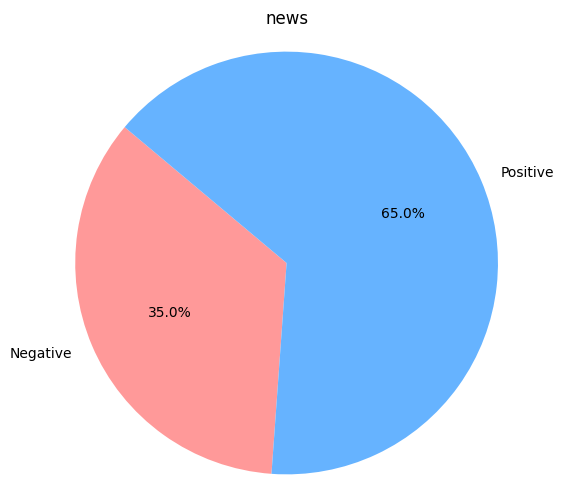

In [96]:
import matplotlib.pyplot as plt

# 라벨별 개수 계산
label_counts = news_df['label'].value_counts()
labels = ['Negative', 'Positive']
sizes = [label_counts[0], label_counts[1]]
colors = ['#ff9999', '#66b3ff']  # 원하는 색상 설정

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('news')
plt.axis('equal')  # 원형 유지
plt.show()

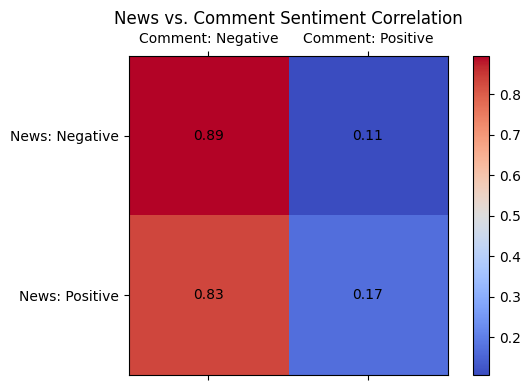

In [93]:
import numpy as np

# 교차표 생성
cross_tab = pd.crosstab(merged_df['label_news'], merged_df['label_comment'])

# 비율로 변환
row_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0)

# 시각화
fig, ax = plt.subplots(figsize=(6, 4))
cax = ax.matshow(row_percentage.values, cmap='coolwarm')

# 값 표시
for (i, j), val in np.ndenumerate(row_percentage.values):
    ax.text(j, i, f"{val:.2f}", va='center', ha='center', color='black')

# 축 설정
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Comment: Negative', 'Comment: Positive'])
ax.set_yticklabels(['News: Negative', 'News: Positive'])
plt.title("News vs. Comment Sentiment Correlation")
plt.colorbar(cax)
plt.tight_layout()
plt.show()

## 라벨링된 데이터 재 import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:

import pandas as pd

news_df = pd.read_csv('/content/drive/MyDrive/2025_textmining/proj/news_tokenize_label.csv')
comments_df = pd.read_csv('/content/drive/MyDrive/2025_textmining/proj/comments_tokenize_label.csv')

comments_sentences = comments_df['clean_content'].tolist()
comments_labels = [int(label) for label in comments_df['label']]

In [3]:
import pandas as pd

# 라벨별로 분리
positive_df = comments_df[comments_df['label'] == 1]
negative_df = comments_df[comments_df['label'] == 0]

# 개수 확인
print("긍정 개수:", len(positive_df))
print("부정 개수:", len(negative_df))

# 몇 배 복제할지 계산
rep_factor = len(negative_df) // len(positive_df)
print(f"긍정 샘플을 {rep_factor}배 복제")

# 복제 및 합치기
positive_upsampled = pd.concat([positive_df] * rep_factor, ignore_index=True)
balanced_df = pd.concat([negative_df, positive_upsampled], ignore_index=True)

# 섞기
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# 결과 확인
print("복제 후 긍정 개수:", sum(balanced_df['label'] == 1))
print("복제 후 부정 개수:", sum(balanced_df['label'] == 0))

긍정 개수: 86
부정 개수: 510
긍정 샘플을 5배 복제
복제 후 긍정 개수: 430
복제 후 부정 개수: 510


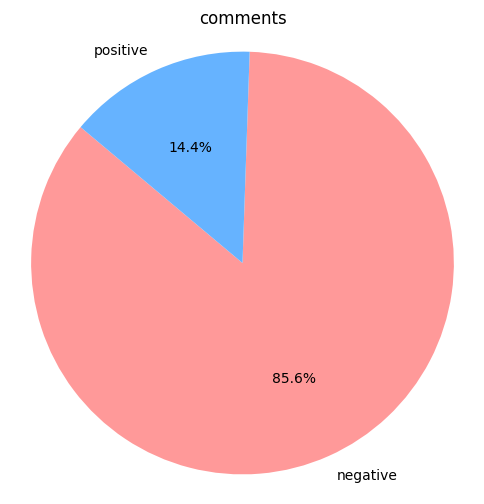

In [97]:
import matplotlib.pyplot as plt

# 라벨별 개수 계산
label_counts = comments_df['label'].value_counts()
labels = ['negative', 'positive']
sizes = [label_counts[0], label_counts[1]]
colors = ['#ff9999', '#66b3ff']  # 원하는 색상 설정

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('comments')
plt.axis('equal')  # 원형 유지
plt.show()

#### 시각화

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [99]:
!pip install wordcloud

In [116]:
comments_df['wordcloud_tokens'].head()

,wordcloud_tokens
0,"['댓글달다', '사람', '한진', '직원', '넘다', '들다', '충분하다',..."
1,"['여기', '댓글', '공무원']"
2,"['특고', '월급쟁이', '힘들다', '하니', '고용', '산재', '라도', ..."
3,"['쿠팡', '시스템', '개판', '만들다', '편하다', '노동자', '목숨',..."
4,"['폐지', '힘들다']"


In [165]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 폰트 경로 (코랩인 경우 이 경로 사용, 로컬은 직접 경로 지정)
font_path = "/content/drive/MyDrive/2025_textmining/proj/Pretendard-Medium.otf"

In [118]:
import ast

# 문자열을 리스트로 바꾸기
def safe_eval(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except:
        return []

In [119]:
# 적용 예시
comments_df['wordcloud_tokens'] = comments_df['wordcloud_tokens'].apply(safe_eval)

In [120]:
comments_df.head()

,Unnamed: 0.1,Unnamed: 0,content,recommends,date,news_title,clean_content,wordcloud_tokens,model_tokens,label
0,0,0,댓글단사람들 한진 직원인듯..주7일은 선넘은듯 난. 택배기사님들 충분히. 이해함,5,2025-05-15 00:40:00,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입",댓글단 사람들 한진 직원인 듯 주 7일은 선 넘은 듯 난 택배기사님들 충분히 이해함,"[댓글달다, 사람, 한진, 직원, 넘다, 들다, 충분하다, 이해]","['댓글달다', '사람', '한진', '직원', '7일', '넘다', '택배', '...",0
1,1,1,여기 댓글 단.분들은 공무원이신갑네.ㅎ,1,2025-05-14 17:52:00,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입",여기 댓글 단 분들은 공무원이 신갑네,"[여기, 댓글, 공무원]","['여기', '댓글', '공무원']",1
2,2,2,특고직 니들이 월급쟁이냐 힘들게 일하니 고용 산재라도 혜택보라구 말그대로 특고직 해...,1,2025-05-14 16:58:00,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입",특고직 니들이 월급쟁이냐 힘들게 일하니 고용 산재라도 혜택보라구 말 그대로 특고직 ...,"[특고, 월급쟁이, 힘들다, 하니, 고용, 산재, 라도, 혜택, 보라, 그대로, 특...","['특고', '월급쟁이', '힘들다', '하니', '고용', '산재', '라도', ...",0
3,3,3,쿠팡이 택배시스템을 개판으로 만들어놨어고객이 편해졌겠지만 노동자들의 목숨과 바꾼것이다,0,2025-05-20 02:25:00,"한진택배 노조, '주7일 배송' 반대하며 반품거부 등 쟁의 돌입",쿠팡이 택배 시스템을 개판으로 만들어놨어 고객이 편해졌겠지만 노동자들의 목숨과 바꾼...,"[쿠팡, 시스템, 개판, 만들다, 편하다, 노동자, 목숨, 바꾸다]","['쿠팡', '택배', '시스템', '개판', '만들다', '고객', '편하다', ...",0
4,4,4,폐지해라 힘들다,3,2025-05-17 06:17:00,주 7일 배송 CJ대한통운 실적 주춤… 후발 업체는 눈치 보기,폐지해라 힘들다,"[폐지, 힘들다]","['폐지', '힘들다']",0


In [125]:
# 긍정/부정 토큰 텍스트 추출
positive_tokens = comments_df[comments_df['label'] == 1]['wordcloud_tokens'].tolist()
negative_tokens = comments_df[comments_df['label'] == 0]['wordcloud_tokens'].tolist()

# 리스트를 문자열로 합치기
positive_text = ' '.join([' '.join(tokens) for tokens in positive_tokens])
negative_text = ' '.join([' '.join(tokens) for tokens in negative_tokens])

In [126]:
wordcloud_stopwords = set([
    '의', '가', '이', '은', '들', '는', '좀', '잘', '과', '도', '를',
    '으로', '자', '에', '와', '한', '하다', '되다', '있다', '없다', '이다', '같다',
    '말하다', '생각하다', '때문', '정도', '자신', '사람', '우리', '더', '다시',
    '이런', '저런', '그런', '걸', '건', '수', '것', '에서', '보다', '하고', '않다', '니다', '해주다', '가다', '아니다', '까지'
])

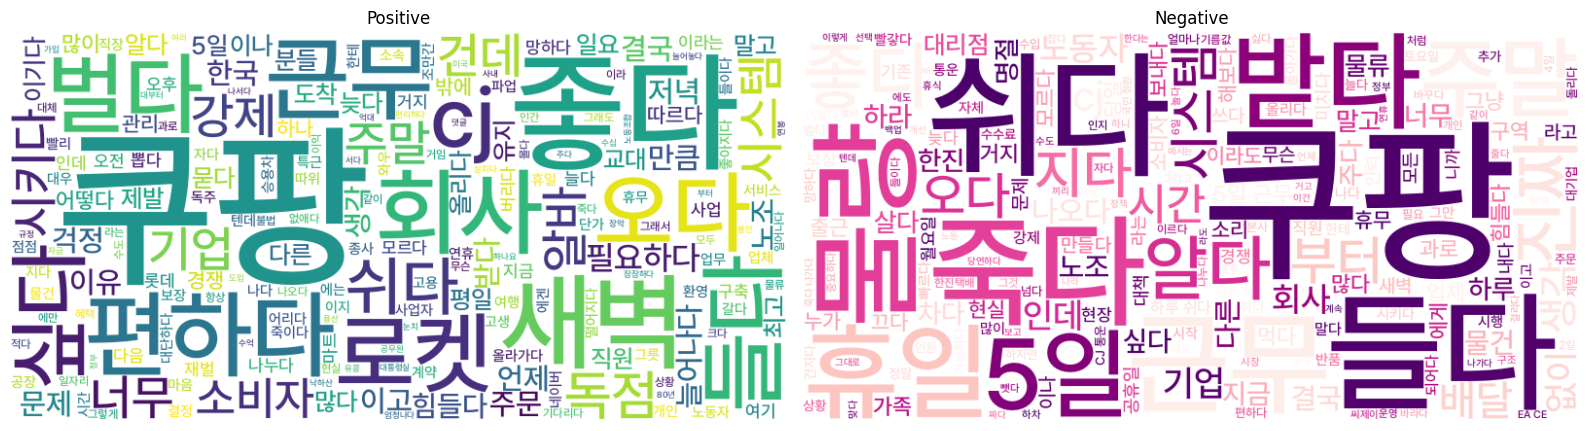

In [127]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WordCloud 객체 생성 (불용어 포함)
wordcloud_pos = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=400,
    stopwords=wordcloud_stopwords
).generate(positive_text)

wordcloud_neg = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=400,
    colormap='RdPu',
    stopwords=wordcloud_stopwords
).generate(negative_text)

# 시각화
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title("Positive")
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Negative")
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
import re

def clean_token_list(token_list):
    return [token for token in token_list if re.match(r'^[가-힣a-zA-Z0-9]+$', token)]

# tokens 컬럼 클린 적용
comments_df['tokens'] = comments_df['tokens'].apply(clean_token_list)

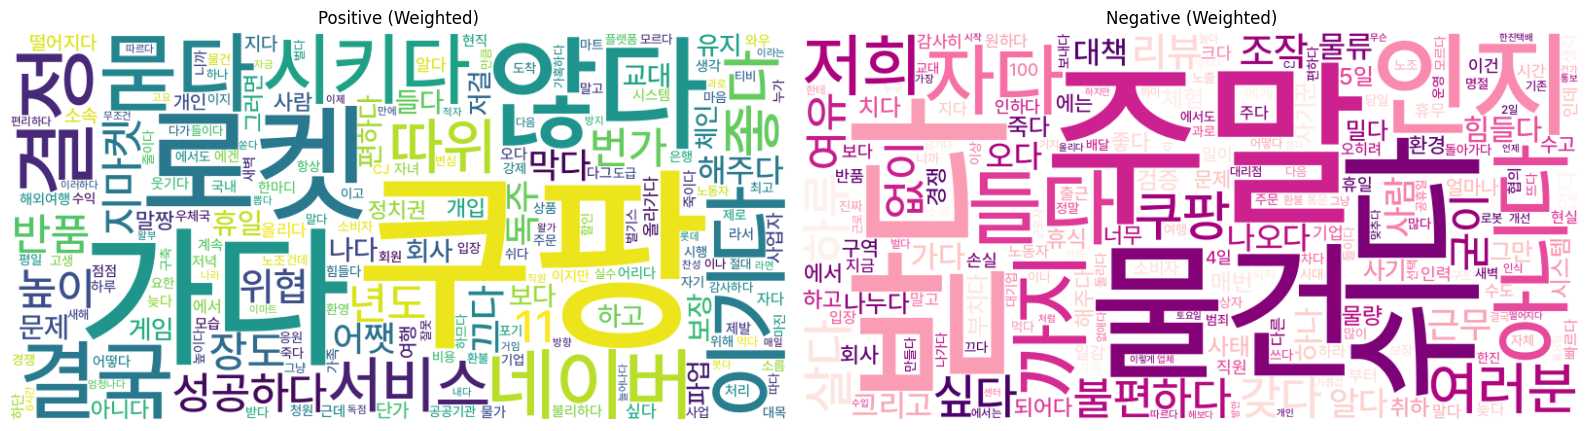

In [132]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict

# ✅ 추천 수 가중치를 반영한 단어 빈도 계산 함수
def compute_weighted_freq(tokens_series, recommends_series):
    word_freq = defaultdict(float)
    for tokens, weight in zip(tokens_series, recommends_series):
        # tokens가 문자열이라면 리스트로 변환
        if isinstance(tokens, str):
            tokens = eval(tokens)
        for token in tokens:
            word_freq[token] += float(weight)
    return word_freq

# 🔵 긍정 댓글 가중치 빈도
positive_df = comments_df[comments_df['label'] == 1]
positive_freq = compute_weighted_freq(positive_df['wordcloud_tokens'], positive_df['recommends'])

# 🔴 부정 댓글 가중치 빈도
negative_df = comments_df[comments_df['label'] == 0]
negative_freq = compute_weighted_freq(negative_df['wordcloud_tokens'], negative_df['recommends'])

# ✅ 워드클라우드 생성
wordcloud_pos = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=400,
    stopwords=wordcloud_stopwords
).generate_from_frequencies(positive_freq)

wordcloud_neg = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=400,
    colormap='RdPu',
    stopwords=wordcloud_stopwords
).generate_from_frequencies(negative_freq)

# ✅ 시각화
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.title("Positive (Weighted)")
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Negative (Weighted)")
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
total = len(comments_df)
negatives = len(comments_df[comments_df['label'] == 0])
negative_ratio = negatives / total * 100

print(f"전체 댓글 수: {total}개")
print(f"부정 댓글 수: {negatives}개")
print(f"부정 비율: {negative_ratio:.2f}%")

전체 댓글 수: 596개
부정 댓글 수: 510개
부정 비율: 85.57%


In [172]:
import pandas as pd

# 추천 수 기준 상위 3% 임계값 계산
top_3_percent_threshold = comments_df['recommends'].quantile(0.97)

# 상위 3% 댓글 추출
top_comments = comments_df[comments_df['recommends'] >= top_3_percent_threshold]

# 확인
print(f"추천수 상위 3% 기준값: {top_3_percent_threshold}")
print(top_comments[['clean_content', 'recommends', 'label']].sort_values(by='recommends', ascending=False).head(10))

추천수 상위 3% 기준값: 56.299999999999955
                                         clean_content  recommends  label
396                      여러분들이 있어서 저희가 물건을 잘 받을 수 있습니다        1533      0
397             주말 배송까지 굳이 해야 할까 좀 불편해도 여유를 갖고 살았으면 싶네        1167      0
193  그리고 쿠팡 체험단인지 사기 조작단인지 리뷰 조작 좀 그만 쳐해라 이 사기꾼들아 리...         548      0
75   택배기사님들 주말에 하루 쉬는 것도 힘들다 대책도 없이 밀어 부칠 때 이런 사태 나...         544      0
194  쿠팡이 성공한 건 로켓배송도 있지만 묻지마 반품이 결정적이다 결국 서비스 질을 높이...         351      1
195  택배기사님들의 수고로 인해서 너무 감사히 받 있는데 주말에는 경쟁 없이 다 들 휴식...         348      0
196                                  어쨋든 쿠팡 독주는 막아야 한다         289      1
76   이건 택배회사의 문제 아닌가 일감 100개를 직원 3명에 나눌 일을 4명으로 나누면...         256      0
229                       다 좋은데 기사들 교대 시키면서 휴일은 보장 해줘라         207      1
197  주 7일 저거 게임 체인저는 될 수 있지만 저걸 유지 할 수 있냐가 문제 파업 나고...         173      1


In [176]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Pretendard 폰트 경로 (예: 구글드라이브 등에서 복사해온 경로로 수정)
font_path = "/content/drive/MyDrive/2025_textmining/proj/Pretendard-Medium.otf"

# FontProperties 객체 생성
fontprop = fm.FontProperties(fname=font_path, size=12)

# matplotlib 전역 설정
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 음수(-) 깨짐 방지

In [185]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns

# Pretendard 폰트 경로
font_path = "/content/drive/MyDrive/2025_textmining/proj/Pretendard-Medium.otf"
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()

# matplotlib 전체 설정
mpl.rcParams['font.family'] = font_name
mpl.rcParams['axes.unicode_minus'] = False

# seaborn도 테마 적용 시 같이 설정
sns.set_theme(style="whitegrid", font=font_name, font_scale=1.1)

<ipython-input-189-273206207>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_comments['sentiment'] = top_comments['label'].map(label_map)
<ipython-input-189-273206207>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


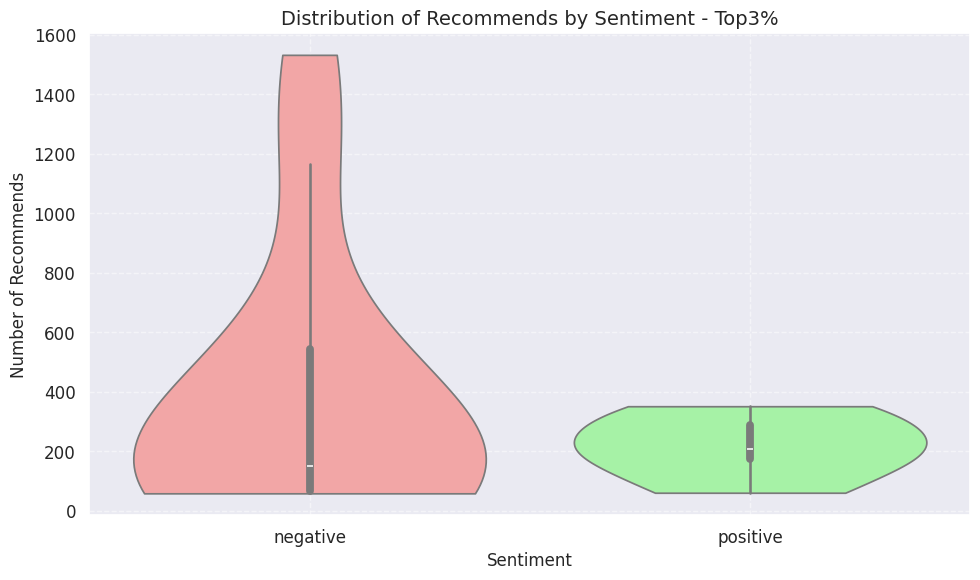

In [189]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns

# Pretendard 폰트 경로
font_path = "/content/drive/MyDrive/2025_textmining/proj/Pretendard-Medium.otf"

# FontProperties 등록 및 이름 얻기
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()

# matplotlib 전체에 적용
mpl.rcParams['font.family'] = font_name
mpl.rcParams['axes.unicode_minus'] = False

# seaborn도 matplotlib의 설정을 그대로 따라감 (이 시점에 실행되면)
sns.set_theme(font=font_name, font_scale=1.1)

# ---- 시각화 코드 ----

# 감정 레이블 매핑
label_map = {0: "negative", 1: "positive"}
top_comments['sentiment'] = top_comments['label'].map(label_map)

plt.figure(figsize=(10, 6))
sns.violinplot(
    data=top_comments,
    x='sentiment',
    y='recommends',
    palette={'negative': '#FF9999', 'positive': '#99FF99'},
    inner='box',
    cut=0
)
plt.title("Distribution of Recommends by Sentiment - Top3%", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Number of Recommends", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

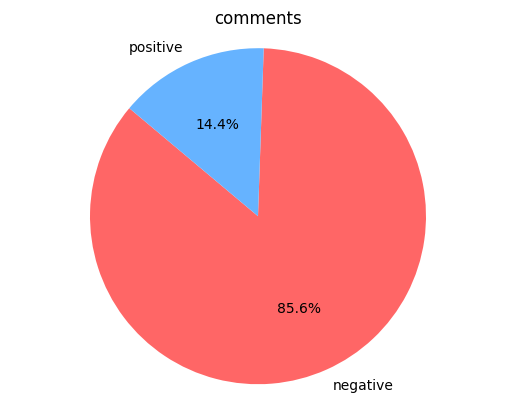

In [179]:
import matplotlib.pyplot as plt

labels = ['negative', 'positive']
sizes = [
    len(comments_df[comments_df['label'] == 0]),
    len(comments_df[comments_df['label'] == 1])
]

colors = ['#ff6666', '#66b3ff']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("comments")
plt.show()